In [14]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mndata = MNIST(r'C:\Users\Zhenia\Desktop\mnist_data')
images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [6]:
print(mndata.display(images[0]))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


In [7]:
c = 0
r = []
for i in images[0]:
    c += 1
    r.append(i)
    if c == 28:
        for j in r:
            if j <= 200:
                print('.', end='')
            else:
                print('@', end='')
        print('')
        r.clear()
        c=0
print(labels[0])

............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................
5


# Цель: Изучить класс Perceptron библиотеки scikit-learn на примере задачи распознавания цифр MNIST

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
ppn = Perceptron() # Без регуляризации, eta0=1

In [10]:
ppn.fit(images[:1000], labels[:1000])

C:\Users\Zhenia\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
ppn.score(images[:1000], np.array(labels[:1000]))

0.949

In [12]:
ppn.fit(images, labels)

C:\Users\Zhenia\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [13]:
ppn.score(images, np.array(labels))

0.8542166666666666

Изменим число итераций:

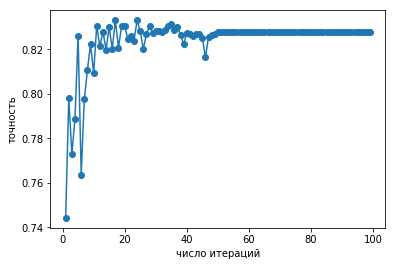

In [17]:
score = []
for max_iter in range(1,100):
    ppn = Perceptron(max_iter=max_iter)
    ppn.fit(images[:1000],labels[:1000])
    score.append(ppn.score(images, np.array(labels)))
plt.plot(range(1,100), score, marker='o')
plt.xlabel('число итераций')
plt.ylabel('точность')
plt.show()

In [18]:
ppn.score(test_images, np.array(test_labels))

0.8252

In [34]:
# обучение с меньшим шагом
ppn = Perceptron(eta0=0.01,max_iter=30)
ppn.fit(images,labels)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=30, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [35]:
ppn.score(test_images, np.array(test_labels))

0.8576

Без регуляризации получилось достичь ошибки 15%

In [63]:
ppn = Perceptron(penalty='l2', max_iter=30, eta0=0.0001)
ppn.fit(images,labels)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.0001, fit_intercept=True,
      max_iter=30, n_iter=None, n_jobs=1, penalty='l2', random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [64]:
ppn.score(test_images, np.array(test_labels))

0.8719

In [71]:
# Работает гораздо медленнее чем l2
ppn = Perceptron(penalty='l1',max_iter=50, eta0=0.1)
ppn.fit(images,labels)
ppn.score(test_images, np.array(test_labels))

0.8668

In [75]:
ppn = Perceptron(penalty='elasticnet', max_iter=50, eta0=0.0001)
ppn.fit(images,labels)
ppn.score(test_images, np.array(test_labels))

0.8367

# Вывод: Удалось достичь 13% ошибки, самой быстрой регуляризацией оказалась L2. Даже линейный классификатор может правильно классифицировать изображения примерно в 8 случаях из 10.